# üîç Segmentaci√≥n de Clientes con Clustering Jer√°rquico, K-Means y DBSCAN

En este notebook analizamos un conjunto de datos de clientes de una tienda retail. Aplicaremos tres algoritmos de *clustering* para identificar patrones y segmentos ocultos:

1. **Clustering Jer√°rquico:** Visualiza relaciones entre datos mediante un dendrograma.
2. **K-Means:** Divide los datos en *k* grupos seg√∫n distancias internas.
3. **DBSCAN:** Agrupa seg√∫n densidad y detecta anomal√≠as autom√°ticamente.

Este an√°lisis es √∫til para dise√±ar campa√±as de marketing personalizadas y detectar perfiles at√≠picos de clientes.


In [1]:
# üì¶ Librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# üé≤ Generar el dataset
np.random.seed(42)
n_samples = 1000
data = {
    "Edad": np.random.randint(18, 65, size=n_samples),
    "Ingreso_Mensual": np.abs(np.random.normal(2500, 800, size=n_samples)).astype(int),
    "Frecuencia_Compra": np.random.poisson(4, size=n_samples),
    "Gasto_Promedio": np.abs(np.random.normal(80, 20, size=n_samples)).round(2)
}
df = pd.DataFrame(data)
df.head()


Edad  Ingreso_Mensual  Frecuencia_Compra  Gasto_Promedio
0    56             3305                  3           53.00
1    46             2038                  5          115.36
2    32             3168                  5           86.40
3    60             1596                  1           51.86
4    25             2923                  3           71.16

In [2]:
# üîÑ Normalizaci√≥n
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


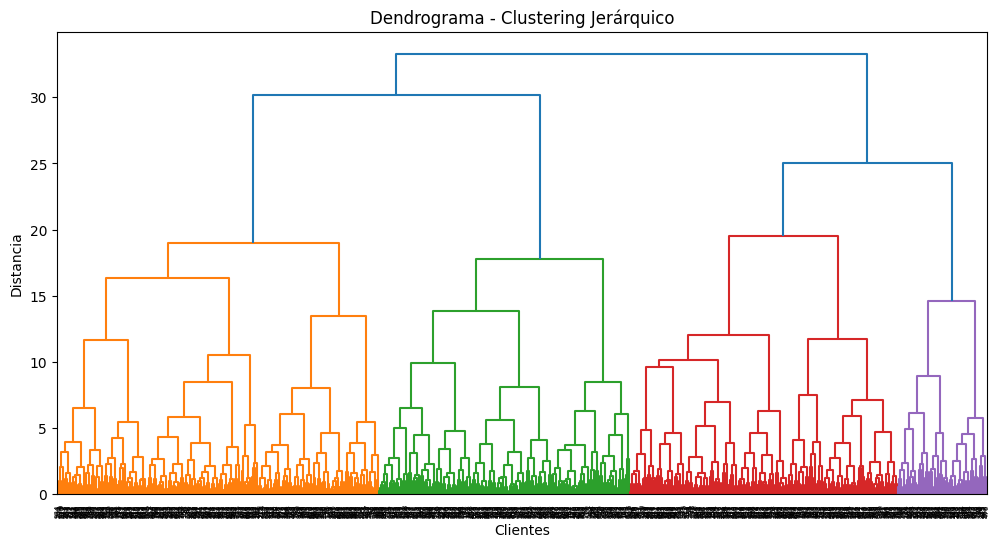

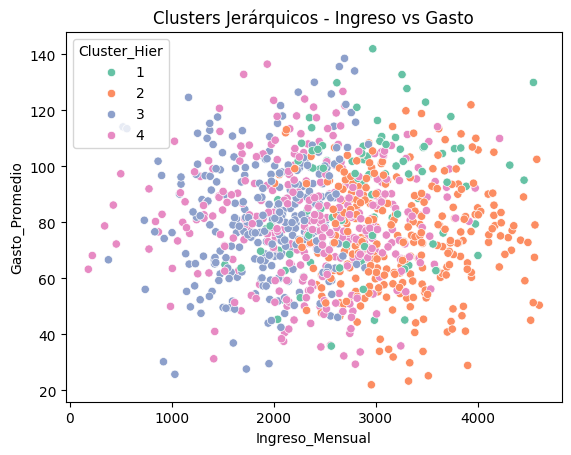

In [3]:
# üå≥ Clustering Jer√°rquico
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrograma - Clustering Jer√°rquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

# ‚úÇÔ∏è Asignaci√≥n de cl√∫steres jer√°rquicos
df["Cluster_Hier"] = fcluster(linked, 4, criterion='maxclust')

# üìà Visualizaci√≥n
sns.scatterplot(data=df, x="Ingreso_Mensual", y="Gasto_Promedio", hue="Cluster_Hier", palette="Set2")
plt.title("Clusters Jer√°rquicos - Ingreso vs Gasto")
plt.show()


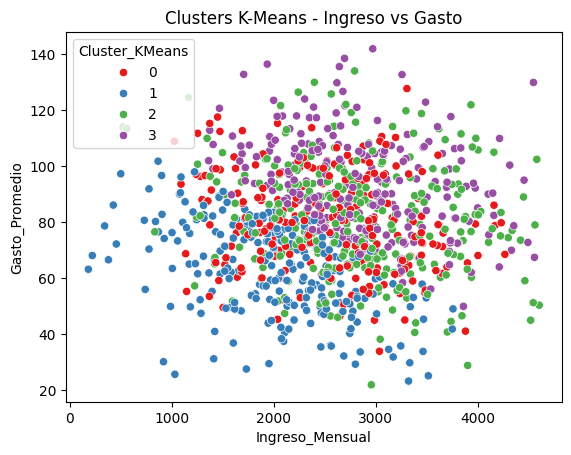

In [4]:
# üìå K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)

# üìâ Visualizaci√≥n
sns.scatterplot(data=df, x="Ingreso_Mensual", y="Gasto_Promedio", hue="Cluster_KMeans", palette="Set1")
plt.title("Clusters K-Means - Ingreso vs Gasto")
plt.show()


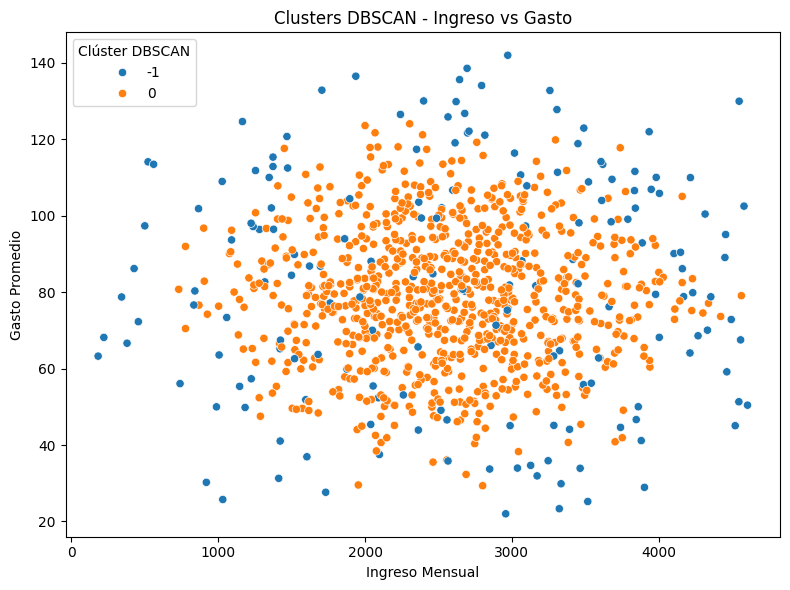

In [5]:
# üåê DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=8)
df["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# üìä Visualizaci√≥n DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Ingreso_Mensual", y="Gasto_Promedio", hue="Cluster_DBSCAN", palette="tab10")
plt.title("Clusters DBSCAN - Ingreso vs Gasto")
plt.xlabel("Ingreso Mensual")
plt.ylabel("Gasto Promedio")
plt.legend(title="Cl√∫ster DBSCAN")
plt.tight_layout()
plt.show()
